In [58]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv('../debate_datasets/debate_4000 bambini morti i.csv')
df.head()

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,k7e1uo7,17lese9,4,TheNomadologist,IuvenisCogitans,"Allora, i paesi che hanno votato contro sono s...",0
1,k7dux9e,17lese9,4,TheNomadologist,IuvenisCogitans,Aspetta non capisco esattamente cosa ti stai c...,15
2,k7dvidh,17lese9,4,TheNomadologist,TaskStreet896,L'astensione dell' India non è stata affatto i...,7
3,k7j7qn3,17lese9,4,IronHeart29,HentaiExxxpert,E per difenderci apriremo il fuoco nella prima...,1
4,k7hdejy,17lese9,4,NjxNaDxb,innerfrei,OP paventava una soluzione politica. \n\nIl pr...,2


In [60]:
debate = df[df['debate_group'] == 4]
debate.head(10)

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,k7e1uo7,17lese9,4,TheNomadologist,IuvenisCogitans,"Allora, i paesi che hanno votato contro sono s...",0
1,k7dux9e,17lese9,4,TheNomadologist,IuvenisCogitans,Aspetta non capisco esattamente cosa ti stai c...,15
2,k7dvidh,17lese9,4,TheNomadologist,TaskStreet896,L'astensione dell' India non è stata affatto i...,7
3,k7j7qn3,17lese9,4,IronHeart29,HentaiExxxpert,E per difenderci apriremo il fuoco nella prima...,1
4,k7hdejy,17lese9,4,NjxNaDxb,innerfrei,OP paventava una soluzione politica. \n\nIl pr...,2
5,k7dw04e,17lese9,4,BreadEnvironmental81,IuvenisCogitans,"Non ci sono alternative, a loro andava bene co...",19
6,k7duhvx,17lese9,4,BreadEnvironmental81,IuvenisCogitans,"I palestinesi hanno """" """" ""votato"" """" "" hamas....",33
7,k7ds7ys,17lese9,4,Toshero_Reborn,IuvenisCogitans,La Jugoslavia però era nemica della NATO. Il m...,-5
8,k7hgjhp,17lese9,4,Toshero_Reborn,joshua_graham999,"""Il fetish della vittima""\n\nStrano modo di di...",1
9,k7dw2e1,17lese9,4,IuvenisCogitans,TheNomadologist,Sono d’accordissimo con te e trovo il tuo comm...,-13


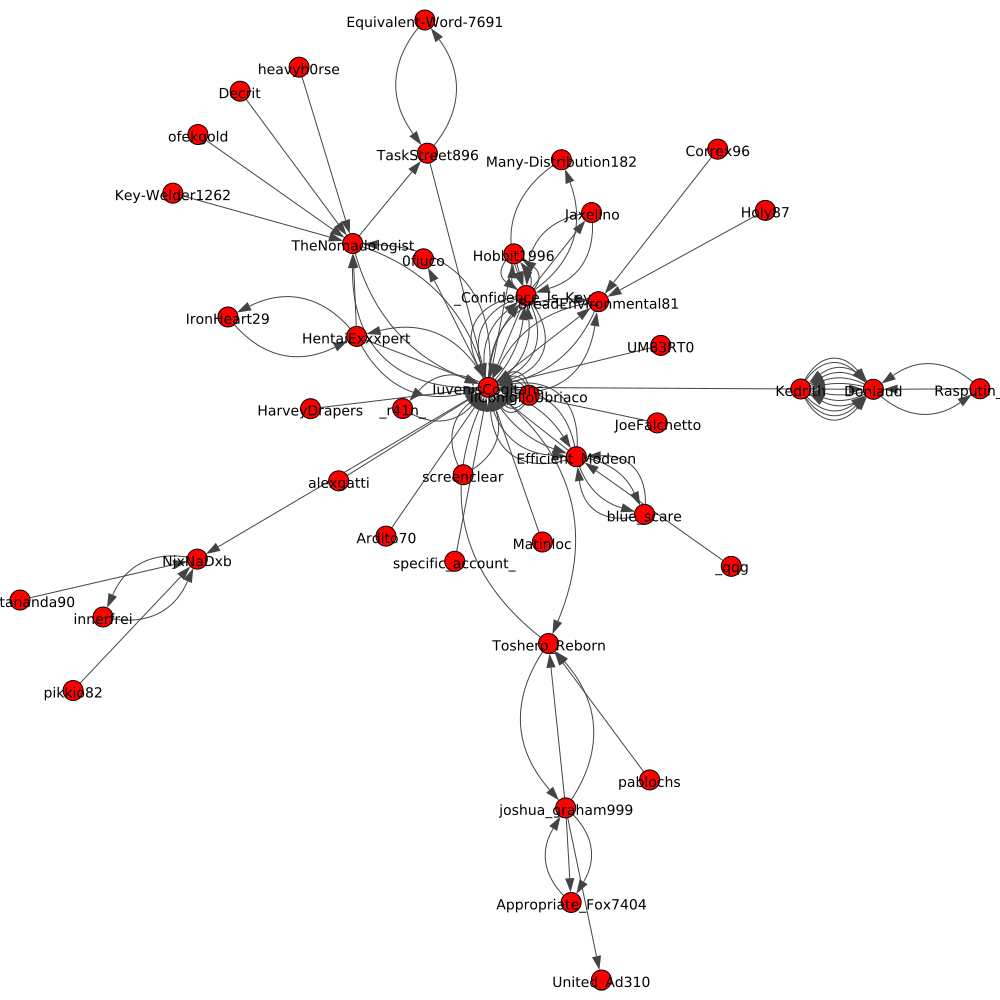

In [61]:
graph = ig.Graph(directed=True)
graph.add_vertex(name='root', label='root')
for comment in debate.iterrows():
    if comment[1]['comment_user_name'] not in graph.vs['name']:
        graph.add_vertex(name=comment[1]['comment_user_name'], label=comment[1]['comment_user_name'])
    if comment[1]['commented_user_name'] not in graph.vs['name']:
        graph.add_vertex(name=comment[1]['commented_user_name'], label=comment[1]['commented_user_name'])
    graph.add_edge(comment[1]['comment_user_name'], comment[1]['commented_user_name'])
    

graph.delete_vertices('root')
ig.plot(graph, bbox=(0, 0, 1000,1000))

# Metriche di valutazione dei grafi di dibattitio

### Calcolo della distribuzione dei gradi

In [64]:
def degree_distribution(graph):
    degree = graph.degree()
    degree = pd.Series(degree)
    degree = degree.value_counts() / degree.count()
    degree = degree.sort_index()
    return degree

### Calcolo del coefficiente di clustering

In [65]:
def compute_average_clustering_coefficient(graph):
    return graph.transitivity_undirected()

print('Average clustering coefficient:', compute_average_clustering_coefficient(graph))

Average clustering coefficient: 0.03409090909090909


### Calcolo della unghezza media 

In [66]:
def compute_average_path_length(graph):
    return graph.average_path_length()

print('Average path length:', compute_average_path_length(graph))

Average path length: 2.917079207920792


### Calcolo della centrialità

In [71]:
def compute_centrality(graph):
    n = len(graph.vs)
    out = 0
    max_degree = max(graph.degree())
    for v in graph.vs:
        out = out + (max_degree - graph.degree(v))

    return out / ((n - 1) * (n - 2)) 

print(compute_centrality(graph))

1.221835075493612


### Calcolo della closeness

In [73]:
def compute_closeness(graph):
    n = len(graph.vs)
    out = 0
    for v in graph.vs:
        out = out + graph.average_path_length(v)
    return (1/out) / (n - 1)

print(compute_closeness(graph))

0.00018981653104651396


### Calcolo del PageRank

In [79]:
def compute_page_rank(graph):
    return graph.pagerank()

print(compute_page_rank(graph))

[0.041313242648567956, 0.23085589725104544, 0.02968914632200722, 0.008350502315545114, 0.020832828797466306, 0.08554916623158894, 0.07664031749293412, 0.0400276476289338, 0.025780399354878143, 0.025619118408688787, 0.013734901829252947, 0.05272577075161422, 0.013734901829252947, 0.03335765309559181, 0.07322412766978512, 0.012634026455037714, 0.0039235261960835245, 0.018862494575707562, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.027506113980553977, 0.024381198469120548, 0.006846050806517384, 0.010147577048015256, 0.00827877632556062, 0.0039235261960835245, 0.01654141338293659, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.0039235261960835245, 0.022595678751878727, 0.010147577048015262, 0.0039235261960835245, 0.0039235261960835245]
